In [401]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline


In [402]:
whale_returns_path = Path("Resources/whale_returns.csv")
algo_returns_path = Path("Resources/algo_returns.csv")
sp500_history_path = Path("Resources/sp500_history.csv")

whale_returns_df = pd.read_csv(whale_returns_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
algo_returns_df = pd.read_csv(algo_returns_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
sp500_history_df = pd.read_csv(sp500_history_path, index_col="Date", parse_dates=True, infer_datetime_format=True)

In [403]:
whale_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [404]:
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [405]:
whale_returns_df = whale_returns_df.dropna()

In [406]:
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [407]:
whale_returns_df.dtypes

SOROS FUND MANAGEMENT LLC      float64
PAULSON & CO.INC.              float64
TIGER GLOBAL MANAGEMENT LLC    float64
BERKSHIRE HATHAWAY INC         float64
dtype: object

In [408]:
algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [409]:
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [410]:
algo_returns_df = algo_returns_df.dropna()

In [411]:
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [412]:
sp500_history_df.sort_index(ascending=True, inplace=True)
sp500_history_df.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [413]:
sp500_history_df.dtypes

Close    object
dtype: object

In [414]:
sp500_history_df['Close'] = sp500_history_df['Close'].str.replace('$', '')
sp500_history_df['Close']

Date
2012-10-01    1444.49
2012-10-02    1445.75
2012-10-03    1450.99
2012-10-04    1461.40
2012-10-05    1460.93
               ...   
2019-04-16    2907.06
2019-04-17    2900.45
2019-04-18    2905.03
2019-04-22    2907.97
2019-04-23    2933.68
Name: Close, Length: 1649, dtype: object

In [415]:
sp500_history_df['Close'] = sp500_history_df['Close'].astype('float')
sp500_history_df['Close'].dtype

dtype('float64')

In [416]:
sp500_history_df.head()

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [417]:
daily_returns_sp500 = sp500_history_df.pct_change()
daily_returns_sp500.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [418]:
daily_returns_sp500 = daily_returns_sp500.dropna()
daily_returns_sp500.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [419]:
sp500_history_df.sort_index(ascending=True, inplace=True)
sp500_history_df.head()

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [420]:
sp500_history_df.rename(columns = {"Close": "S&P500"}, inplace=True)

In [421]:
sp500_history_df.head()

,S&P500
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [422]:
column_appended_df = pd.concat([whale_returns_df, algo_returns_df, sp500_history_df], axis="columns", join="inner")
column_appended_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,2107.78
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,2098.53
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,2101.04
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,2071.26
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,2079.43
...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,2907.06
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,2900.45
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,2905.03


In [423]:
combined_df = pd.concat([whale_returns_df, algo_returns_df, sp500_history_df], axis="columns", join="inner")
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,2107.78
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,2098.53
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,2101.04
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,2071.26
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,2079.43


In [424]:
combined_daily_returns = combined_df.pct_change()
combined_daily_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,-2.762070,-1.650792,4.113646,-1.641381,3.422374,-3.544766,-0.004389
2015-03-05,0.800968,0.257544,-1.929234,0.596558,-0.888803,0.789231,0.001196
2015-03-06,-2.968465,-1.876837,-4.601872,-2.947282,4.190043,-3.650914,-0.014174
2015-03-09,-1.073656,-2.182252,-1.688907,-0.873840,0.098917,-1.113716,0.003944


<AxesSubplot:xlabel='Date'>

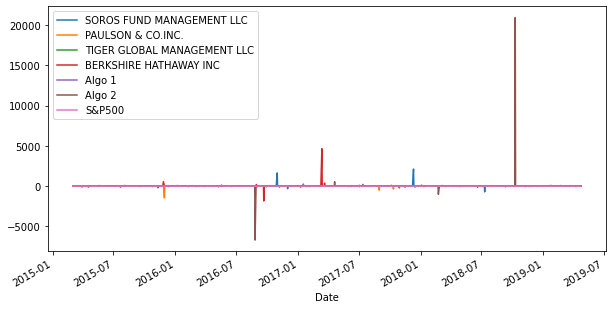

In [425]:
combined_daily_returns.plot(figsize=(10, 5))

In [426]:
cumulative_returns = (1 + combined_daily_returns).cumprod() - 1
cumulative_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,-2.762070,-1.650792,4.113646,-1.641381,3.422374,-3.544766,-0.004389
2015-03-05,-4.173432,-1.818399,-5.751772,-2.024002,-0.508246,-5.553173,-0.003198
2015-03-06,5.246788,-0.282397,16.115278,0.994020,1.552226,11.070068,-0.017326
2015-03-09,-1.460116,-1.848387,-12.790828,-0.748434,1.804686,-2.372559,-0.013450
...,...,...,...,...,...,...,...
2019-04-16,NaN,NaN,NaN,NaN,2.575824,-4.053688,0.379205
2019-04-17,NaN,NaN,NaN,NaN,4.303997,4.506320,0.376069
2019-04-18,NaN,NaN,NaN,NaN,-0.697282,0.294590,0.378242


<AxesSubplot:xlabel='Date'>

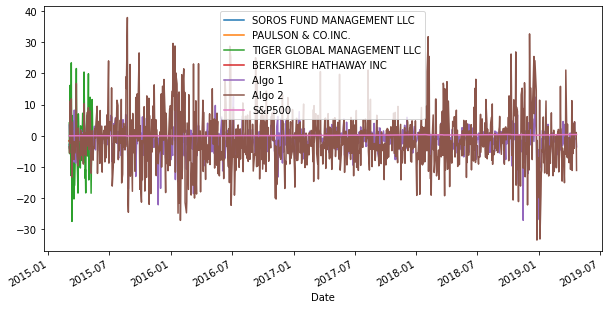

In [427]:
cumulative_returns.plot(figsize=(10,5))

<AxesSubplot:>

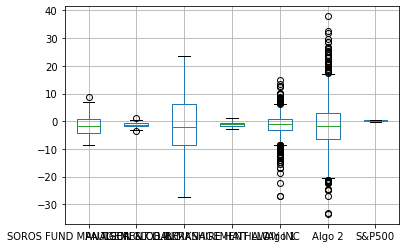

In [428]:
cumulative_returns.boxplot()


In [429]:
all_portfolio_std = cumulative_returns.std()
all_portfolio_std.head()

SOROS FUND MANAGEMENT LLC       4.141413
PAULSON & CO.INC.               0.857016
TIGER GLOBAL MANAGEMENT LLC    11.642719
BERKSHIRE HATHAWAY INC          1.016634
Algo 1                          3.925305
dtype: float64

In [430]:
daily_returns_sp500 = sp500_history_df.pct_change()
sp500_std = daily_returns_sp500.std()
sp500_std.head()

S&P500    0.008111
dtype: float64

In [431]:
all_portfolio_std_annual = all_portfolio_std.std() * np.sqrt(252)
sp500_std_annual = sp500_std.std() * np.sqrt(252)

all_portfolio_std_annual

69.23059671387105

In [432]:
combined_df.rolling(window=21).std().dropna()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
Date,,,,,,,
2015-03-31,0.005764,0.004641,0.006731,0.007108,0.007866,0.006867,21.011611
2015-04-01,0.005744,0.004467,0.006750,0.007005,0.007886,0.006894,20.233870
2015-04-02,0.005749,0.004502,0.006739,0.006958,0.007601,0.006955,19.633860
2015-04-06,0.005792,0.004492,0.006786,0.006884,0.007648,0.007028,18.734424
2015-04-07,0.005452,0.004385,0.006486,0.006193,0.007531,0.006530,18.737542
...,...,...,...,...,...,...,...
2019-04-16,0.006711,0.006224,0.007532,0.009731,0.005760,0.007053,37.532613
2019-04-17,0.006773,0.006370,0.007574,0.009485,0.006229,0.007165,38.079125
2019-04-18,0.006633,0.006303,0.007328,0.009475,0.005834,0.007172,38.149890


<AxesSubplot:xlabel='Date'>

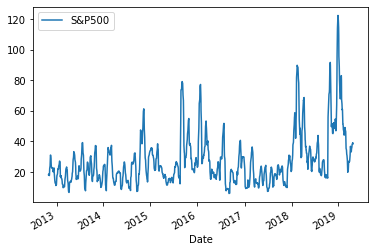

In [433]:
sp500_history_df.rolling(window=21).std().dropna().plot()

<AxesSubplot:xlabel='Date'>

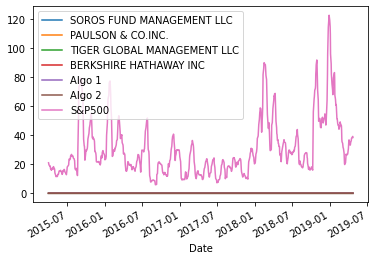

In [434]:
combined_df.rolling(window=21).std().plot()

In [435]:
price_correlation = combined_df.corr()

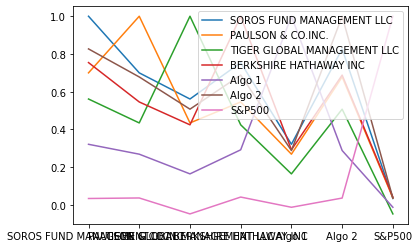

In [436]:
price_correlation = combined_df.corr().plot()

<AxesSubplot:xlabel='Date'>

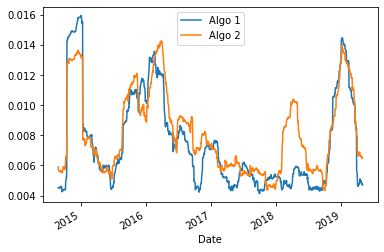

In [437]:
algo_returns_df.rolling(window=60).std().dropna().plot()

In [438]:
soros_covariance = combined_df["SOROS FUND MANAGEMENT LLC"].cov(combined_df['S&P500'])
covariance

0.09253560040168177

In [439]:
berkshire_covariance = combined_df["BERKSHIRE HATHAWAY INC"].cov(combined_df['S&P500'])
covariance

0.09253560040168177

In [440]:
algo1_covariance = combined_df["Algo 1"].cov(combined_df['S&P500'])
covariance

0.09253560040168177

In [441]:
algo2_covariance = combined_df["Algo 2"].cov(combined_df['S&P500'])
covariance

0.09253560040168177

In [442]:
variance = combined_df['S&P500'].var()
variance

93545.51613814369

In [443]:
soros_beta = covariance / variance
soros_beta

9.892040177001052e-07

In [444]:
rolling_soros_covariance = combined_df["SOROS FUND MANAGEMENT LLC"].rolling(window=30).cov(combined_df['S&P500'])


In [445]:
rolling_berkshire_covariance = combined_df["BERKSHIRE HATHAWAY INC"].rolling(window=30).cov(combined_df)

In [446]:
rolling_algo1_covariance = combined_df["Algo 1"].rolling(window=30).cov(combined_df)

In [447]:
rolling_algo2_covariance = combined_df["Algo 2"].rolling(window=30).cov(combined_df)

<AxesSubplot:title={'center':'Rolling 30-Day Covariance of SOROS FUND MANAGEMENT LLC Returns vs. S&P 500 Returns'}, xlabel='Date'>

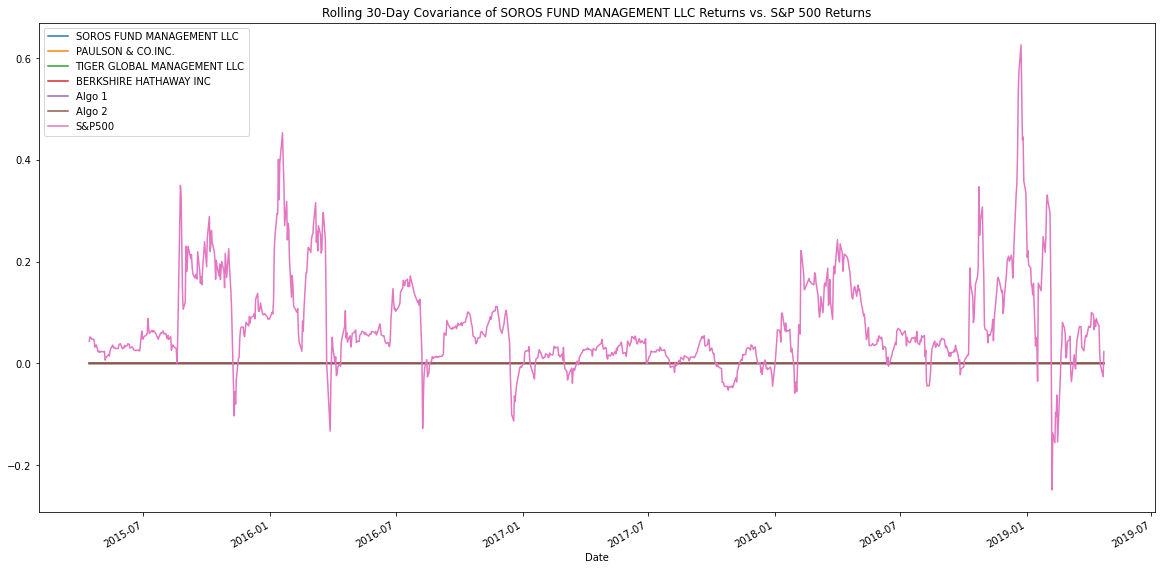

In [448]:
rolling_covariance.plot(figsize=(20, 10), title='Rolling 30-Day Covariance of SOROS FUND MANAGEMENT LLC Returns vs. S&P 500 Returns')

In [450]:
Annualized_Sharpe_Ratios = (combined_daily_returns.mean() * 252) / (all_portfolio_std * np.sqrt(252))
Annualized_Sharpe_Ratios.head()

SOROS FUND MANAGEMENT LLC           NaN
PAULSON & CO.INC.                   NaN
TIGER GLOBAL MANAGEMENT LLC         NaN
BERKSHIRE HATHAWAY INC              NaN
Algo 1                        -2.983502
dtype: float64

In [449]:
ax = rolling_soros.plot(figsize=(20, 10)
rolling_berkshire_sharpe_ratios.plot(ax=ax)
rolling_algo1_sharpe_ratios.plot(ax=ax)
rolling_algo2_sharpe_ratios.plot(ax=ax)

ax.legend(["SOROS FUND MANAGEMENT LLC", "BERKSHIRE HATHAWAY INC.", "Algo 1", "Algo 2"])
           
           

SyntaxError: invalid syntax (<ipython-input-449-109609ad2bff>, line 2)